## Difference-in-Differences

So far we haven't considered situations where we want to assess the **effect of macro interventions** - when we've got periods **before** and **after** an intervention, and we want to **untangle the impact of it from a general trend**.

Naively, we would simply check the outcome before and after the intervention for the treated group. However, how can we know if an increase or a decrease is not the result of a natural trend? This is why we need a proper technique/framework for addressing this challenge.

As we can imagine, now we have to consider another dimension: time. Hence, let's use the following notation:

- $D$ is our treatment;
- $T$ is time;
- $Y_{D}(T)$ is the potential outcome for treatment $D$ at time $T$.

In a perfect world where we can actually observe counterfactuals, estimating ATE is pretty much straightforward:

$ATE = \mathbb{E}[Y_{1}(1) - Y_{0}(1) | D=1]$

Usually, people tend to assume that $\mathbb{E}[Y_{0}(1)|D=1] = \mathbb{E}[Y_{0}(0)|D=1]$, which is obviously false in the presence of natural trends. Another common approach would be to **compare the treated with an untreated group that didn't get the intervention**. However, we need to assure that both groups have the same baseline level.

##### How to solve this problem?

> The treated **after the intervention**, had it not been treated, would look like the **treated before the intervention** plus a **growth factor** that is the same as the growth of the control.

In mathematical terms:

$\mathbb{E}[Y_{0}(1) | D=1] = \mathbb{E}[Y_{1}(0) | D=1] + (\mathbb{E}[Y_{0}(1) | D=0] - \mathbb{E}[Y_{0}(0) | D=0])$

##### What about standard errors?

There is a neat trick that relies on standard regression.

$Y_{i} = \beta_{0} + \beta_{1}D_{i} + \beta_{2}AFTER_{i} + \beta_{3}(AFTER_{i}D_{i})$

From this equation, we can clearly realize that:

- $\beta_{0}$ is the baseline of the control;
- $\beta_{0} + \beta_{1}$ is the baseline of the treated;
- $\beta_{0} + \beta_{2}$ is the control after intervention - so $\beta_{2}$ is the expected trend.

Therefore, since $(\beta_{0} + \beta_{1}) + \beta_{2} + \beta_{3}$ is the final outcome for the treated after the intervation, we can conclude that **$\beta_{3}$ is the incremental impact**.

## Difference-in-Differences

So far we haven't considered situations where we want to assess the **effect of macro interventions** - when we've got periods **before** and **after** an intervention, and we want to **untangle the impact of it from a general trend**.

Naively, we would simply check the outcome before and after the intervention for the treated group. However, how can we know if an increase or a decrease is not the result of a natural trend? This is why we need a proper technique/framework for addressing this challenge.

As we can imagine, now we have to consider another dimension: time. Hence, let's use the following notation:

- $D$ is our treatment;
- $T$ is time;
- $Y_{D}(T)$ is the potential outcome for treatment $D$ at time $T$.

In a perfect world where we can actually observe counterfactuals, estimating ATE is pretty much straightforward:

$ATE = \mathbb{E}[Y_{1}(1) - Y_{0}(1) | D=1]$

Usually, people tend to assume that $\mathbb{E}[Y_{0}(1)|D=1] = \mathbb{E}[Y_{0}(0)|D=1]$, which is obviously false in the presence of natural trends. Another common approach would be to **compare the treated with an untreated group that didn't get the intervention**. However, we need to assure that both groups have the same baseline level.

##### How to solve this problem?

> The treated **after the intervention**, had it not been treated, would look like the **treated before the intervention** plus a **growth factor** that is the same as the growth of the control.

In mathematical terms:

$\mathbb{E}[Y_{0}(1) | D=1] = \mathbb{E}[Y_{1}(0) | D=1] + (\mathbb{E}[Y_{0}(1) | D=0] - \mathbb{E}[Y_{0}(0) | D=0])$

Thus:

$ATE = (\mathbb{E}[Y(1)| D=1] - \mathbb{E}[Y(1)| D=0]) + (\mathbb{E}[Y(0)| D=1] - \mathbb{E}[Y(0)| D=0])$

##### What about standard errors?

There is a neat trick that relies on standard regression.

$Y_{i} = \beta_{0} + \beta_{1}D_{i} + \beta_{2}AFTER_{i} + \beta_{3}(AFTER_{i}D_{i})$

From this equation, we can clearly realize that:

- $\beta_{0}$ is the baseline of the control;
- $\beta_{0} + \beta_{1}$ is the baseline of the treated;
- $\beta_{0} + \beta_{2}$ is the control after intervention - so $\beta_{2}$ is the expected trend.

Therefore, since $(\beta_{0} + \beta_{1}) + \beta_{2} + \beta_{3}$ is the final outcome for the treated after the intervation, we can conclude that **$\beta_{3}$ is the incremental impact**.

### Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.formula.api as smf

from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

### Data

For the sake of simplicity and learning, we are going to use an adapted version of a well-known dataset from Card and Krueger (1994).

The aim is to estimate the **causal effect of an increase in the state minimum wage on the employment**. On April 1st, 1992, New Jersey raised the state minimum wage from $4.25 to $5.05, while the minimum wage in Pennsylvania stays the same at $4.25.

Since both states are geographically close to each other and the demographics are similar, we can use data on both of them, in order to answer the causal query.

Variables:
- `state` is a flag: 1 for New Jersey (treatment), 0 for Pennsylvania (control).
- `total_emp_feb` is the total number of employees of sampled restaurantes, in February 1992 - before the increase.
- `total_emp_nov ` is the total number of employees of sampled restaurantes, in November 1992 - after the increase.

In [2]:
df = pd.read_csv("../data/employment.csv",)
df.head()

,state,total_emp_feb,total_emp_nov
0,0,40.50,24.0
1,0,13.75,11.5
2,0,8.50,10.5
3,0,34.00,20.0
4,0,24.00,35.5


We need to adapt the dataset a little bit, in order to reflect the relationship in time:

In [3]:
df = pd.concat([
    df.rename(columns={"total_emp_feb": "emp"}).assign(after_increase=0).drop(columns=["total_emp_nov"]),
    df.rename(columns={"total_emp_nov": "emp"}).assign(after_increase=1).drop(columns=["total_emp_feb"]),
], axis=0)
df.head()

,state,emp,after_increase
0,0,40.50,0
1,0,13.75,0
2,0,8.50,0
3,0,34.00,0
4,0,24.00,0


Some basic definitions:

In [4]:
Y = "emp"
D = "state"
T = "after_increase"

Let's visualize it:

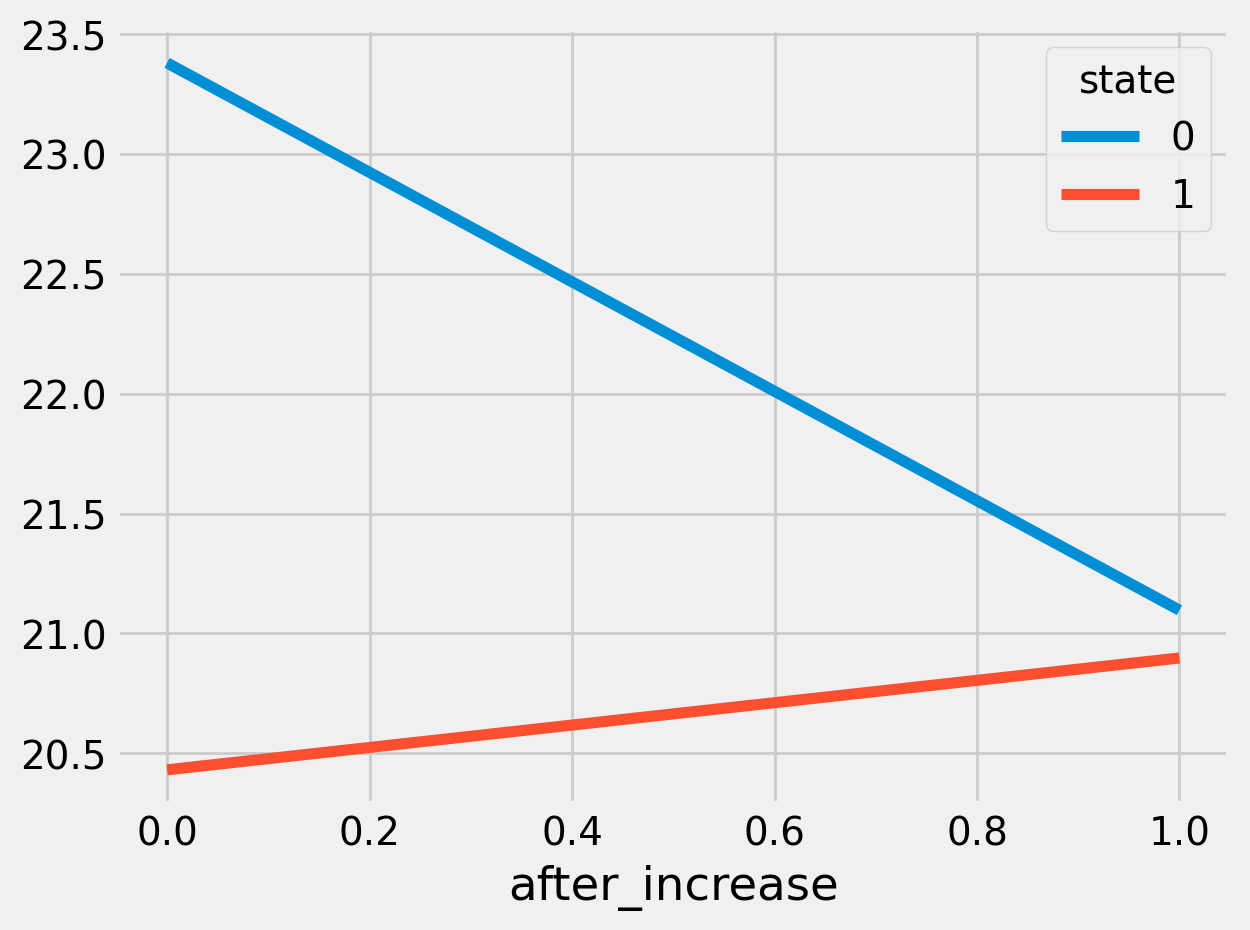

In [5]:
pd.pivot_table(
    data=df,
    index=T,
    columns=D,
    values=Y,
    aggfunc=np.mean
).plot();

As we can figure out from the visualization above, we would expect employment rate to actually decrease, given the natural trend.However, with the intervention, it seems that the treated faces an increase in the employment rate. This raises suspition that there is a statistically significant effect. 

### Theoretical Approach Step-By-Step

Let's apply what we've seen in the theoretical introduction.

In [6]:
model = smf.ols(
    formula=f"{Y} ~ {D} * {T}",
    data=df
).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,23.3800,1.098,21.288,0.000,21.224,25.536
state,-2.9494,1.224,-2.409,0.016,-5.353,-0.546
after_increase,-2.2833,1.553,-1.470,0.142,-5.332,0.766
state:after_increase,2.7500,1.731,1.588,0.113,-0.649,6.149


Our estimate for the effect of increasing the minimum wage is +2.75 employees / restaurant. However, contraty to expectations, this estimate is **not statistically significant**, as the confidence interval contains 0 ($p\_value > 0.05$)

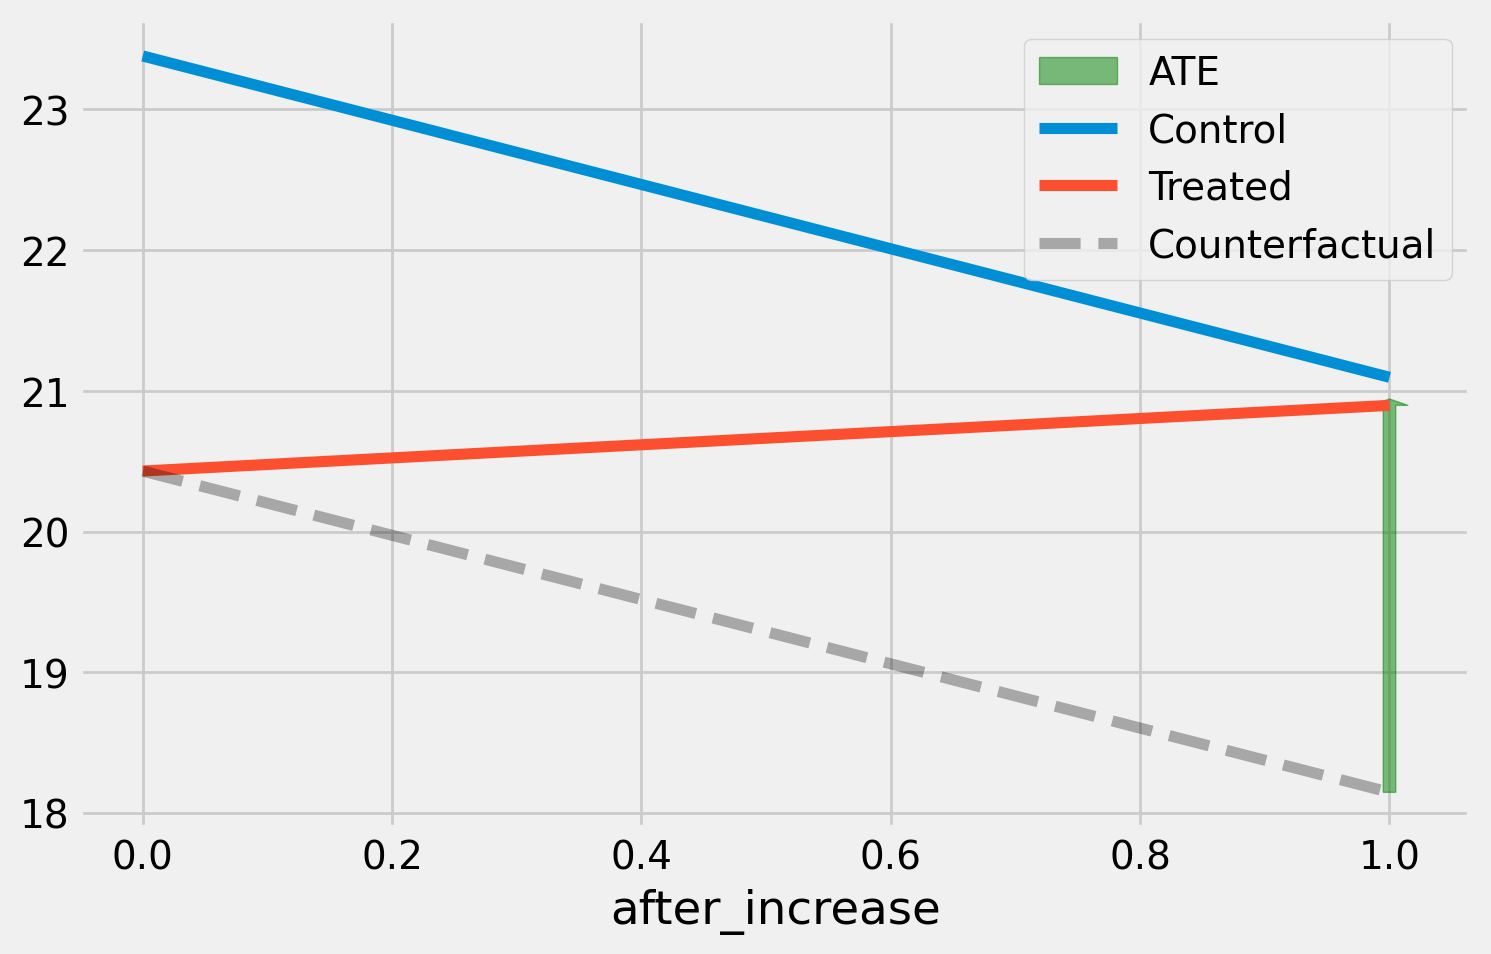

In [7]:
_, ax = plt.subplots(1, 1, figsize=(8,5))

agg_df = pd.pivot_table(
    data=df,
    index=T,
    columns=D,
    values=Y,
    aggfunc=np.mean
).rename(columns={0: "Control", 1: "Treated"})

treated_baseline = agg_df.loc[0,  "Treated"]
treated_outcome = agg_df.loc[1,  "Treated"]
treated_counterfactual = treated_baseline + model.params[T]


ax.arrow(
    x=1, y=treated_counterfactual, dx=0, dy=(treated_outcome-treated_counterfactual), 
    width=0.01, color="green", alpha=0.5, label="ATE"
)
agg_df.plot(ax=ax)
ax.plot(
    [0, 1], [treated_baseline, treated_counterfactual],
    linestyle="--", color="black", alpha=0.3, label="Counterfactual"
)

plt.legend()
plt.show()

### Our approach

In [8]:
# from causal_inference.linear import DiffInDiffEstimator

In [9]:
# m = DiffInDiffEstimator(
#     data=df,
#     outcome=Y,
#     treatment=T,
#     time_dimension=TIMEm
# )
# m.fit()

In [10]:
# m.estimate_ate(plot_result=True)